In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
diabetes_data = pd.read_csv('diabetes.csv' , encoding = 'UTF-8')

###### Exploratory Data Analysis

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Data visualization

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

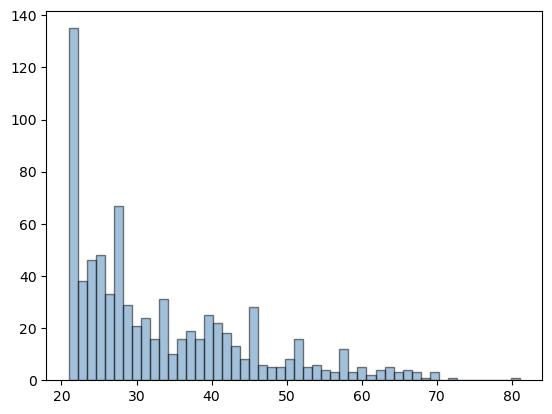

In [9]:
plt.hist(diabetes_data['Age'], bins=50,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black');

<Axes: >

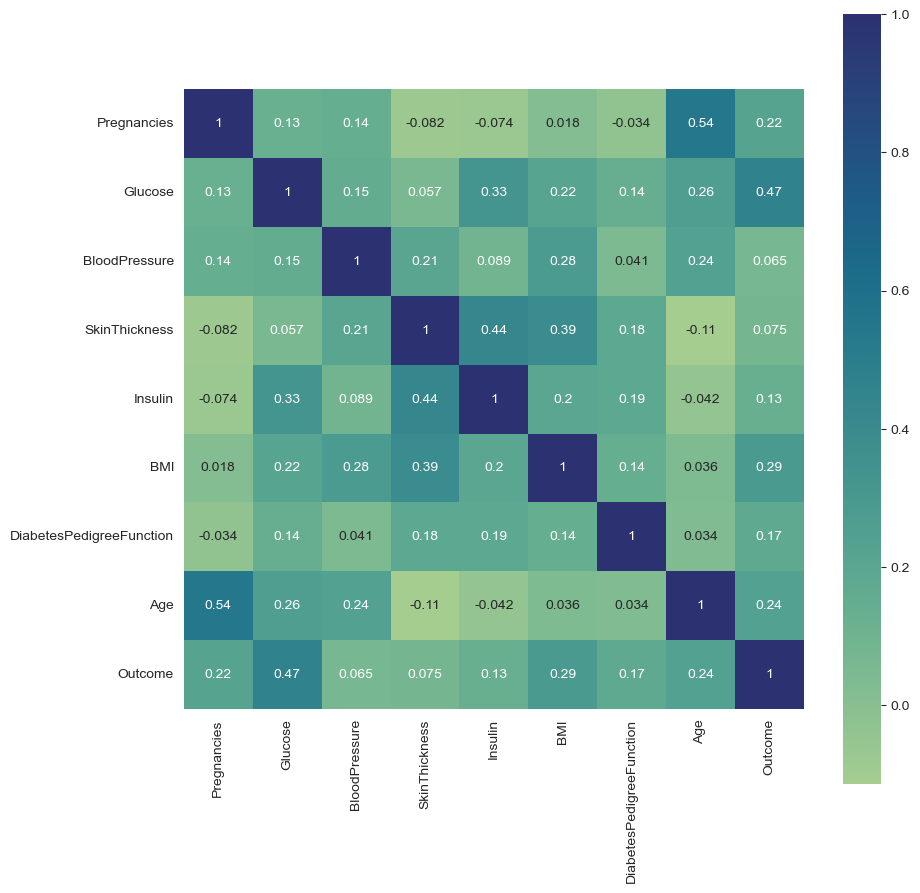

In [11]:
correlation_matrix = diabetes_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap= "crest",annot=True,square=True, )

###### Train LR model

In [13]:
X = diabetes_data.drop(columns = 'Outcome' , axis = 1)
y = diabetes_data['Outcome']

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      test_size = 0.2,
                                                      random_state = 33)

In [48]:
print('shape of X testing is : ',X_test.shape)
print('shape of y testing is : ',y_test.shape)

shape of X testing is :  (154, 8)
shape of y testing is :  (154,)


In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train , y_train)

C:\Users\yuguerten\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
print("the intercept is : ", str(model.intercept_))
print("the coefficient are : " , str(model.coef_))
print("the R_squered is : " , str(model.score(X_train , y_train)))

the intercept is :  [-8.41794626]
the coefficient are :  [[ 0.12936     0.03561427 -0.01287754  0.00415553 -0.00106295  0.09222906
   0.52009347  0.01209491]]
the R_squered is :  0.7833876221498371


In [54]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [55]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7833876221498371


In [56]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , y_test)

In [57]:
print('accuracy on test data : ', test_data_accuracy)

accuracy on test data :  0.7337662337662337


###### building a predictive system

In [60]:
input_data = (8 , 180,  140 ,23 , 88 ,36.3 , 1.68 , 48)

data_np = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = data_np.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction == 0 :
    print('the preson does not have a diabetes disease')
else :
    print('the prerson have a diabetes disease')

[1]
the prerson have a diabetes disease


C:\Users\yuguerten\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


###### Save and load the model

In [61]:
import pickle

In [64]:
filename = 'diabests_disease_model.sav'
pickle.dump(model,open(filename , 'wb'))

In [66]:
#load the model
loaded_model = pickle.load(open('diabests_disease_model.sav' , 'rb'))

In [67]:
input_data = (8 , 180,  140 ,23 , 88 ,36.3 , 1.68 , 48)

data_np = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = data_np.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction == 0 :
    print('the preson does not have a diabetes disease')
else :
    print('the prerson have a diabetes disease')

[1]
the prerson have a diabetes disease


C:\Users\yuguerten\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
